# chapter 1, scratch 
Source: A. Geron, homl, 3rd ed.  
By: Jennifer E Yoon
Date: 2/23/2023 4am EDT  
Env: local, wsl2, conda base w Python v 3.9, --no-browser flag

In [9]:
# import libraries  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# different  
from sklearn.linear_model import LinearRegression  
# class object, LinearRegression
# submodule package name w underscore, linear_model
import sklearn

In [3]:
!python --version

/bin/bash: /home/jyoon/conda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Python 3.9.12


In [10]:
sklearn.__version__

'1.0.2'

In [11]:
np.random.seed(42)

In [17]:
# Test download data from URL  
data_root = "https://github.com/ageron/data/raw/main/"
data = pd.read_csv(data_root + "lifesat/lifesat.csv")
# read_csv is underscore, class method? 2nd dot will be confusing after pd. dot.  
# forgot "/" last folder divider in data_root.  
# combined URL needs to have proper folder path structure on Github.com.  
data

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


In [18]:
type(data)
# pd.read_csv creates a dataframe by default.  

pandas.core.frame.DataFrame

In [20]:
data.columns

Index(['Country', 'GDP per capita (USD)', 'Life satisfaction'], dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 776.0+ bytes


In [40]:
a = data.iloc[:, 1]
b = data.iloc[:, 2]
a.head(5), b.head(5)

(0    26456.387938
 1    27287.083401
 2    28384.987785
 3    29932.493910
 4    31007.768407
 Name: GDP per capita (USD), dtype: float64,
 0    5.8
 1    5.4
 2    5.5
 3    5.9
 4    5.6
 Name: Life satisfaction, dtype: float64)

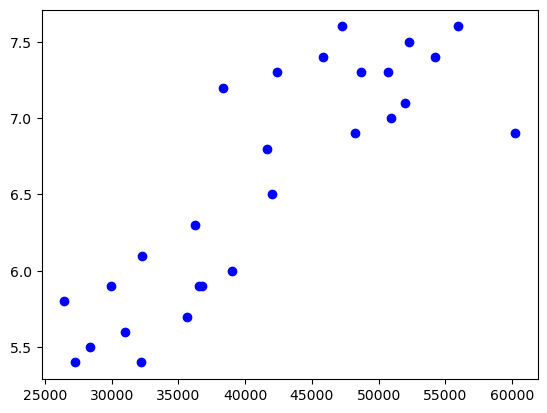

In [41]:
fig = plt.figure(1)
plt.plot(a, b, 'bo')
# basic matplotlib pyplot without any formatting

In [34]:
type(data)

pandas.core.frame.DataFrame

/home/jyoon/conda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='GDP per capita (USD)', ylabel='Life satisfaction'>

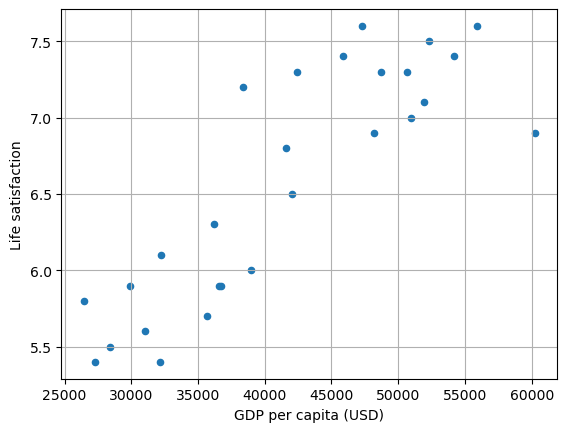

In [54]:
# book uses pandas plot, wrapper around matplotlib pyplot.   
#x = data[["GDP per capita (USD)"]].values
#y = data[["Life satisfaction"]].values
#type(x)  # ndarray
# No need to define x, y ndarray, plot uses keynames from data df.  

type(data) # dataframe still
# data.plot(kind='scatter', x ='GDP', y = 'Lifesat')  
# creates a key-error. data[x].values, data[y].values.  
# quoted text is used as "key" to lookup column in dataframe to plot. 
# text needs to match dataframe column name exactly.  

data.plot(kind='scatter', grid=True, x="GDP per capita (USD)", y='Life satisfaction')
#plt.axis([23_500, 62_500, 4, 9])
#plt.show() 

In [52]:
x = 0
y = 1

In [55]:
print(x, y)

0 1


In [59]:
# train linear regression  
# here is where ndarray X and y are used  
X = data[["GDP per capita (USD)"]].values
y = data[["Life satisfaction"]].values
print(X[:5], y[:5])

# specify the regression model
model = LinearRegression()  # class name
model.fit(X, y)

[[26456.38793813]
 [27287.08340093]
 [28384.98778463]
 [29932.49391006]
 [31007.76840654]] [[5.8]
 [5.4]
 [5.5]
 [5.9]
 [5.6]]


LinearRegression()

In [61]:
# make a prediction for Cypr_655.2us, 2020 GDP per capita  
X_cyprus = [[37_655.2]]
# why is _ used for thousand mark?  
# reasoning for double brackets?  dataframe column selector?  
print(model.predict(X_cyprus))

[[6.30165767]]


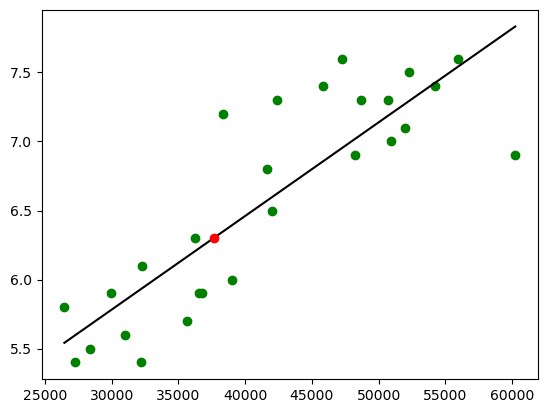

In [68]:
# add regression line  

y_pred = model.predict(X)

fig = plt.figure(2)
plt.scatter(X, y, color='g') 
plt.plot(X, y_pred, color='k') 
plt.plot(37655, 6.30166, 'ro')

In [ ]:
# add arrow annotation ?  
# need more help on how to add an arrow to matplotlib.  

position_text = {
    "Cyprus": (37_655, 6.3),
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    # if US, else country:  
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))

In [ ]:
# Simple arrow
plt.annotate('Maximum value of sin(x)',xy=(1.55,0.98),xytext=(1,-0.25),
             arrowprops={"width":6,"headwidth":20,'headlength':20},
             horizontalalignment='center',fontsize=15)

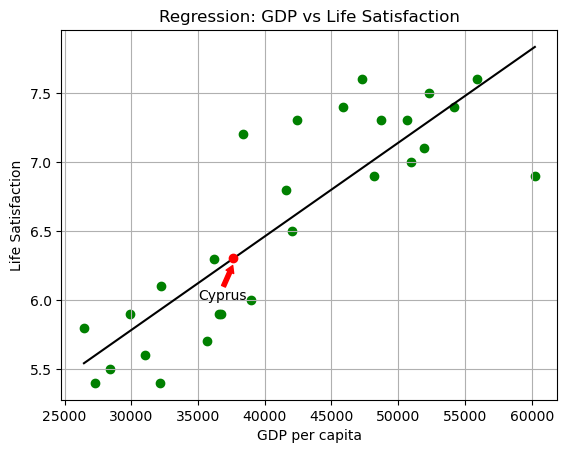

In [94]:
fig = plt.figure(3)
plt.scatter(X, y, color='g') 
plt.plot(X, y_pred, color='k') 
plt.plot(37655, 6.30166, 'ro')
plt.annotate('Cyprus', xy=(37600, 6.25), xytext=(35000, 6), 
             arrowprops={"width":3,"headwidth":6,'headlength':5, 'color':'r'},
             horizontalalignment='left', fontsize=10, color='k')
plt.xlabel('GDP per capita')
plt.ylabel('Life Satisfaction')
plt.title("Regression: GDP vs Life Satisfaction")
plt.grid(True)
plt.savefig('chp1_GDP_LifeSat.png', format='png')
# worked. Need to save in the same cell as when figure is drawn in memory. 

# arrow annotate: xy= point to, xytext= text location, 
# arrowprops= dictionary modifies arrow, key-value.  
# aligns text, fontsize, color of text.  
# can also have curing arrow, with arc angle, arrow style.  
# https://www.scaler.com/topics/matplotlib/arrow-in-matplotlib/  

### 3/7/2023 9am - 11am continue

**Memo:** Cyprus is not part of the countries for which life satisfaction survey is available. Closest I can find is Happiness Index. in 2015 this index was 5.55, and in 2021 this index was 6.22. (On a scale of 0 to 10, 10 is most happy).  

In [1]:
### To reproduce work for 2022. 
# Data needs to pass through pipeline again.  

### Exercises (1-19)  

1) How would you define machine learning?

A method for auto-differentiation and grouping of items based on a distance measure of abstract concepts. The machine learns an internal encoding space, which represents abstract concepts. Items closer together on the encoding space have closer meaning or concepts. 

2) Can you name 4 types of applications where it shines?  

Classification (images, text)
Regression  
Natural Language Processing (text-to-text translation) 
Generation (images - Stable Diffusion; text ChatGPT)
Tree-based: Random Forest, XGBoost (decision trees, segmentation)
Clustering similar items (k-nearest-neighbor)

3) What is labeled training set? 

A dataset used for training the dl model where each input item has an associated label. Ex. image classification task where each image file has an associated category label, such as dog or cat. It is a Supervised Learning task.   







Later - copy answers from book notebook.  





